In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [12]:
hp=pd.read_csv('Housing.csv')

# Data Analysis

In [13]:
hp.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
hp.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [15]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [24]:
hp.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [16]:
hp.shape

(545, 13)

In [17]:
hp.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_11636\3814045739.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hp.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


# Checking Null Values

In [19]:
hp.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: >

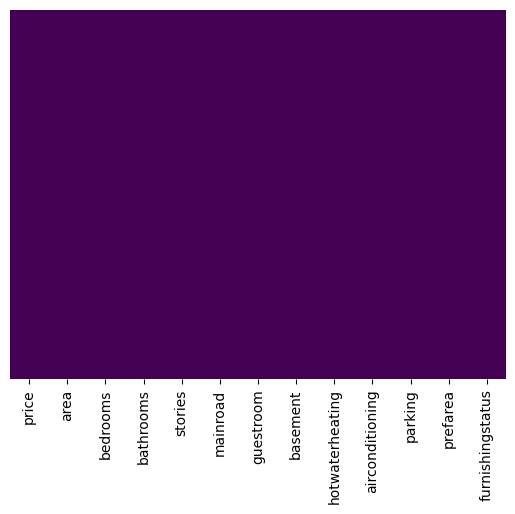

In [20]:
sns.heatmap(hp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
hp.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [23]:
hp['price'].nunique()

219

In [25]:
hp['area'].nunique()

284

In [26]:
hp['bedrooms'].nunique()

6

In [27]:
hp['bathrooms'].nunique()

4

In [28]:
hp['stories'].nunique()

4

In [29]:
hp['mainroad'].nunique()

2

In [30]:
hp['guestroom'].nunique()

2

In [31]:
hp['basement'].nunique()

2

In [32]:
hp['hotwaterheating'].nunique()

2

In [33]:
hp['airconditioning'].nunique()

2

In [34]:
hp['parking'].nunique()

4

In [35]:
hp['prefarea'].nunique()

2

In [36]:
hp['furnishingstatus'].nunique()

3

In [37]:
hp['price'].value_counts()

3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: price, Length: 219, dtype: int64

In [38]:
x=hp[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
y=hp[['price']]

In [39]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [40]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [41]:
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [42]:
x=pd.get_dummies(x) 

In [43]:
x

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1
541,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
543,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [45]:
x.dtypes

area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_no                        uint8
mainroad_yes                       uint8
guestroom_no                       uint8
guestroom_yes                      uint8
basement_no                        uint8
basement_yes                       uint8
hotwaterheating_no                 uint8
hotwaterheating_yes                uint8
airconditioning_no                 uint8
airconditioning_yes                uint8
prefarea_no                        uint8
prefarea_yes                       uint8
furnishingstatus_furnished         uint8
furnishingstatus_semi-furnished    uint8
furnishingstatus_unfurnished       uint8
dtype: object

In [47]:
y.dtypes

price    int64
dtype: object

C:\Users\HP\AppData\Local\Temp\ipykernel_11636\2610450308.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hp.corr(),annot = True)


<Axes: >

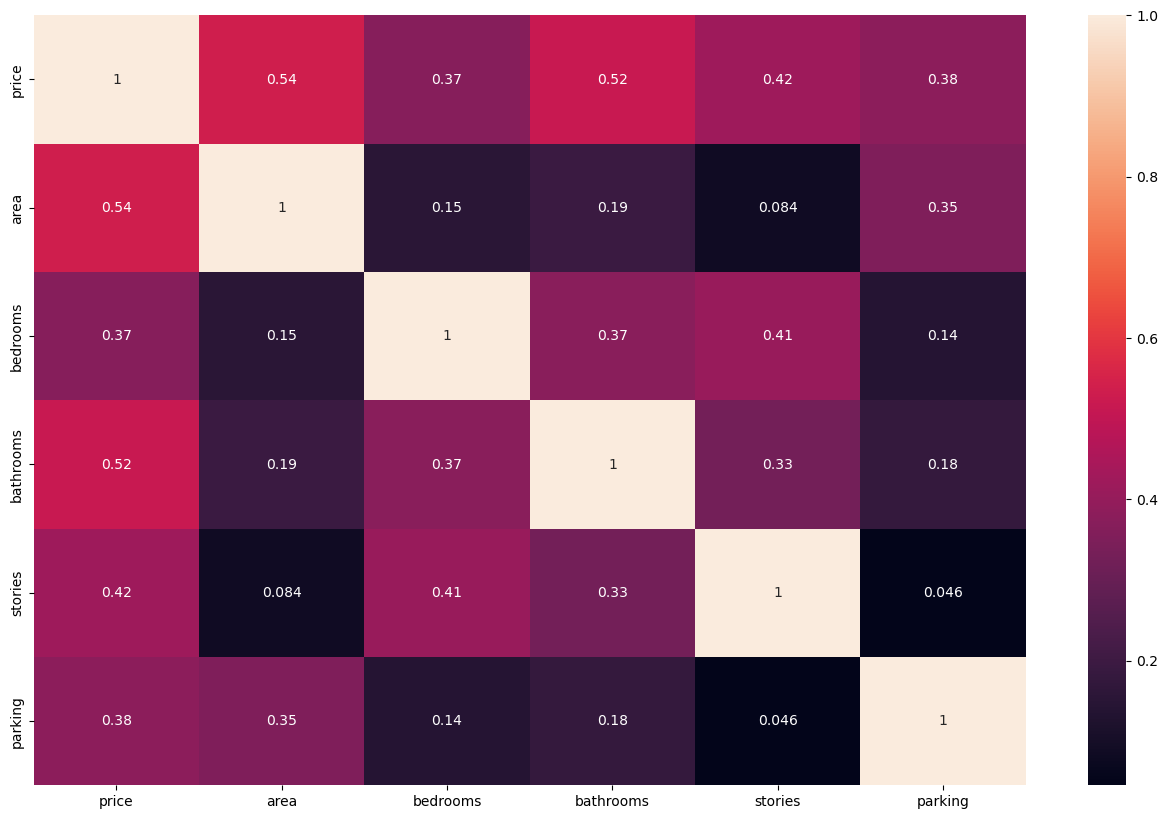

In [48]:
plt.figure(figsize = (16,10))     
sns.heatmap(hp.corr(),annot = True)

<Axes: xlabel='price', ylabel='count'>

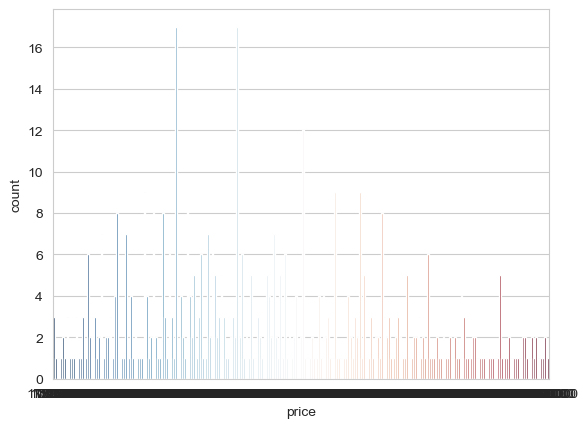

In [63]:
sns.set_style('whitegrid')
sns.countplot(x='price',data=hp,palette='RdBu_r')

<Axes: xlabel='area'>

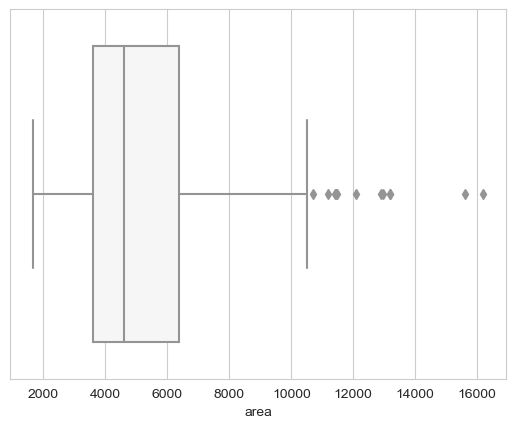

In [55]:
sns.set_style('whitegrid')
sns.boxplot(x='area',hue='price',data=hp,palette='RdBu_r')

<Axes: xlabel='bedrooms', ylabel='price'>

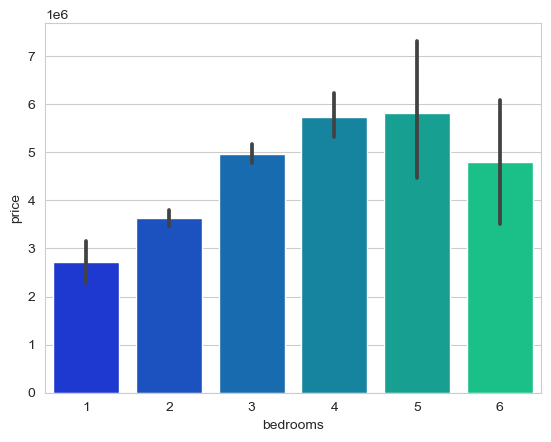

In [72]:
sns.set_style('whitegrid')
sns.barplot(x='bedrooms',y='price',data=hp, palette='winter')

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [64]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(x_train,y_train)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
predictions = logmodel.predict(x_test)

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
result=confusion_matrix(y_test,predictions)
print(result)
print(classification_report(y_test,predictions))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

     1820000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         2
     1960000       0.00      0.00      0.00         1
     2100000       0.00      0.00      0.00         1
     2240000       0.00      0.00      0.00         1
     2380000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         2
     2485000       0.00      0.00      0.00         1
     2590000       0.00      0.00      0.00         1
     2604000       0.00      0.00      0.00         1
     2653000       0.00      0.00      0.00         2
     2660000       0.00      0.00      0.00         4
     2730000       0.00      0.00      0.00         1
     2800000       0.00      0.00      0.00         1
     2870000       0.00      0.00      0.00         1
     2940000   

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall 

In [68]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall 

              precision    recall  f1-score   support

     1820000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         2
     1960000       0.00      0.00      0.00         1
     2100000       0.00      0.00      0.00         1
     2240000       0.00      0.00      0.00         1
     2380000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         2
     2485000       0.00      0.00      0.00         1
     2590000       0.00      0.00      0.00         1
     2604000       0.00      0.00      0.00         1
     2653000       0.00      0.00      0.00         2
     2660000       0.00      0.00      0.00         4
     2730000       0.00      0.00      0.00         1
     2800000       0.00      0.00      0.00         1
     2870000       0.00      0.00      0.00         1
     2940000       0.00      0.00      0.00         3
     3010000       0.00      0.00      0.00         3
     3080000       0.00    

<Axes: >

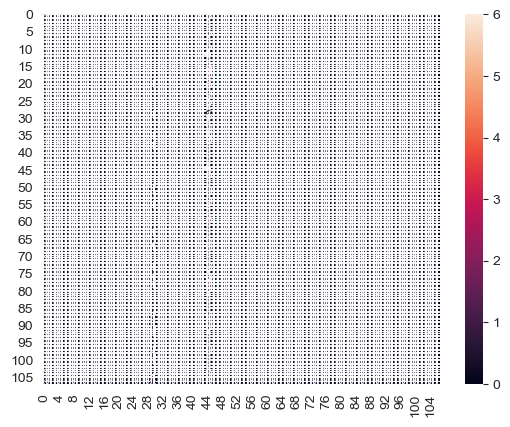

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test,predictions))
sns.heatmap(cm, annot=True)